In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import GaussianNoise

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

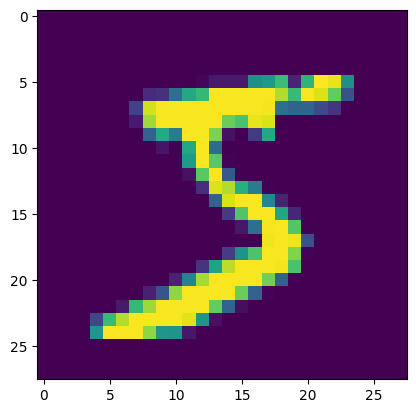

In [6]:
plt.imshow(X_train[0]);

In [7]:
X_train.max()

np.uint8(255)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train.shape

(60000, 28, 28)

In [11]:
encoder = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(units=400, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
])

In [12]:
decoder = Sequential([
    Input(shape=(25,)),
    Dense(units=50, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=28*28, activation='sigmoid'),
    Reshape([28,28])
])

In [16]:
autoencoder = Sequential([encoder, decoder])

In [17]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=[X_test, X_test])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2708 - loss: 0.1047 - val_accuracy: 0.2709 - val_loss: 0.1001
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2808 - loss: 0.0990 - val_accuracy: 0.2798 - val_loss: 0.0987
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2835 - loss: 0.0980 - val_accuracy: 0.2821 - val_loss: 0.0992
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2879 - loss: 0.0969 - val_accuracy: 0.2808 - val_loss: 0.0971
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2904 - loss: 0.0953 - val_accuracy: 0.2827 - val_loss: 0.0958
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2923 - loss: 0.0948 - val_accuracy: 0.2867 - val_loss: 0.0951
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2946 - loss: 0.0938 - val_accuracy: 0.2878 - val_loss: 0.0939
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2984 - loss: 0.0928 - val_accuracy: 

In [20]:
generated_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


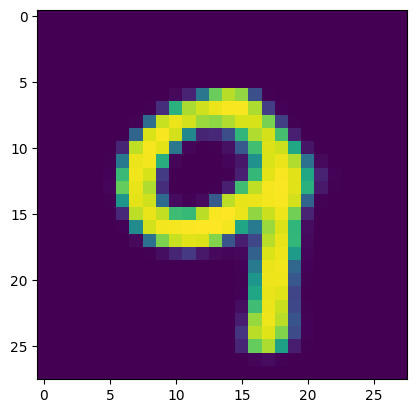

In [22]:
plt.imshow(generated_images[99]);

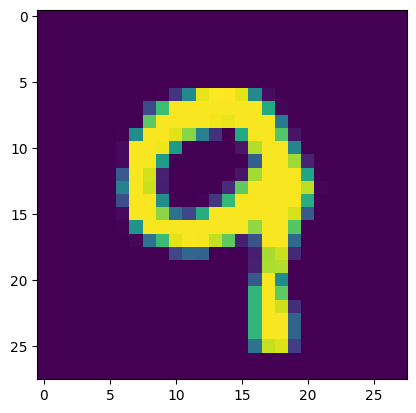

In [23]:
plt.imshow(X_test[99]);

In [24]:
sample = GaussianNoise(0.2)

In [25]:
noisey = sample(X_test[99], training=True)

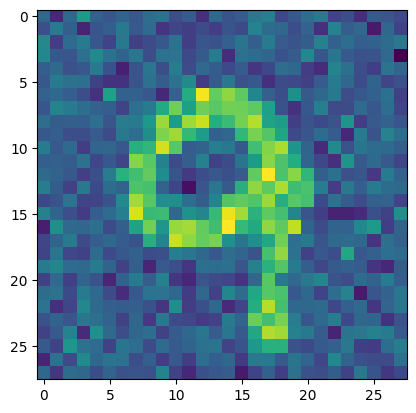

In [28]:
plt.imshow(noisey);

In [29]:
encoder = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    GaussianNoise(0.2),
    Dense(units=400, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
])

In [30]:
decoder = Sequential([
    Input(shape=(25,)),
    Dense(units=50, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=28*28, activation='sigmoid'),
    Reshape([28,28])
])

In [31]:
noise_remover = Sequential([encoder, decoder])

In [32]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
noise_remover.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=[X_test, X_test])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0887 - loss: 0.2800 - val_accuracy: 0.1948 - val_loss: 0.1576
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2035 - loss: 0.1513 - val_accuracy: 0.2244 - val_loss: 0.1328
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2276 - loss: 0.1328 - val_accuracy: 0.2399 - val_loss: 0.1228
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2400 - loss: 0.1242 - val_accuracy: 0.2549 - val_loss: 0.1165
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2500 - loss: 0.1171 - val_accuracy: 0.2550 - val_loss: 0.1087
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2542 - loss: 0.1127 - val_accuracy: 0.2678 - val_loss: 0.1054
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2619 - loss: 0.1089 - val_accuracy: 0.2636 - val_loss: 0.1025
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2660 - loss: 0.1063 - val_accuracy: 

In [34]:
noisey_images = sample(X_test, training=True)
denoised_images = noise_remover(noisey_images)

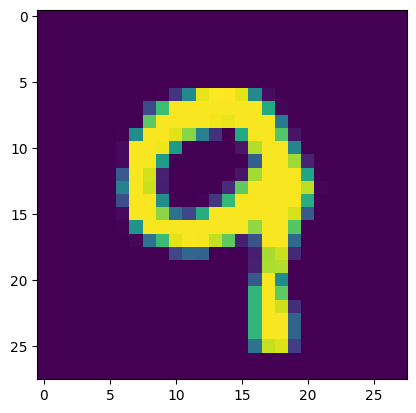

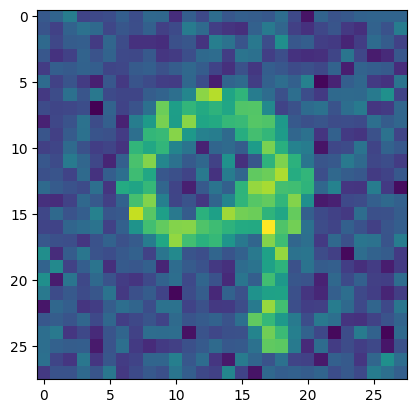

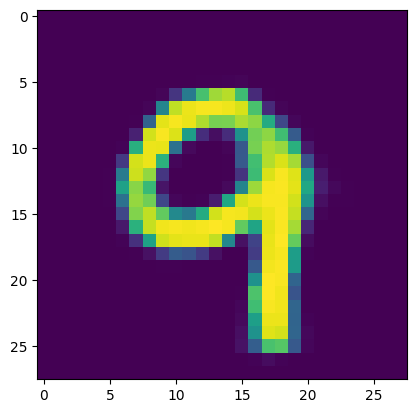

In [35]:
plt.imshow(X_test[99]);
plt.show()
plt.imshow(noisey_images[99]);
plt.show()
plt.imshow(denoised_images[99]);